In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import time
from scipy import stats
from scipy.stats import zscore
import random
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import itertools
from typing import List
import time
from scipy import stats
from scipy.stats import zscore
import random
import sys

In [308]:
df=pd.read_csv('final.csv',index_col=0)

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [309]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_me

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 689 entries, Recnum to merches_state_count_1_by_30
dtypes: float64(606), int64(69), object(14)
memory usage: 507.5+ MB


In [310]:
df.columns.get_loc('Cardnum_day_since')

18

In [311]:
df_prepare = pd.concat([df[['Fraud']], df.iloc[:,18:]], axis = 1)
df_prepare

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/me

In [312]:
# z-scale the numerical variables
df_modeling_zscale = df_prepare.apply(zscore)
df_modeling_zscale['Fraud'] = df_prepare['Fraud']

In [233]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df



def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))

In [313]:
df_modeling_zscale = optimize(df_modeling_zscale)
df_modeling_zscale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 672 entries, Fraud to merchdes_state_count_1_by_30
dtypes: float32(671), int8(1)
memory usage: 247.6 MB


In [314]:
df_oot = df_modeling_zscale.loc[(df['Date'] >= '2010-11-01')]
df_modeling_scaled = df_modeling_zscale.loc[((df['Date'] < '2010-11-01') & (df['Date'] > '2010-01-14'))]

In [315]:
df_oot.to_csv('df_oot.csv')
df_modeling_scaled.to_csv('df_modeling_scaled.csv')

In [237]:
df_modeling_scaled.head()

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,Merch description_day_since,Merch description_count_0,Merch description_avg_0,Merch description_max_0,Merch description_med_0,Merch description_total_0,Merch description_actual/avg_0,Merch description_actual/max_0,Merch description_actual/med_0,Merch description_actual/toal_0,Merch description_count_1,Merch description_avg_1,Merch description_max_1,Merch description_med_1,Merch description_total_1,Merch description_actual/avg_1,Merch description_actual/max_1,Merch description_actual/med_1,Merch description_actual/toal_1,Merch description_count_3,Merch description_avg_3,Merch description_max_3,Merch description_med_3,Merch description_total_3,Merch description_actual/avg_3,Merch description_actual/max_3,Merch description_actual/med_3,Merch description_actual/toal_3,Merch description_count_7,Merch description_avg_7,Merch description_max_7,Merch description_med_7,Merch description_total_7,Merch description_actual/avg_7,Merch description_actual/max_7,Merch description_actual/med_7,Merch description_actual/toal_7,Merch description_count_14,Merch description_avg_14,Merch description_max_14,Merch description_med_14,Merch description_total_14,Merch description_actual/avg_14,Merch description_actual/max_14,Merch description_actual/med_14,Merch description_actual/toal_14,Merch description_count_30,Merch description_avg_30,Merch description_max_30,Merch description_med_30,Merch description_total_30,Merch description_actual/avg_30,Merch description_actual/max_30,Merch description_actual/med_30,Merch description_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/me

In [238]:
data = deepcopy(df_modeling_scaled)

In [239]:
good_ind = np.where(data['Fraud'] == 0)
bad_ind = np.where(data['Fraud'] == 1)
good = data.iloc[good_ind]
bad = data.iloc[bad_ind]

In [240]:
KSFDR = np.zeros([2, data.shape[1]])
numbads = data['Fraud'].sum()
topRows = int(round(len(data)*0.03))
print('Top 3% rows:',topRows)
print('No of frauds',numbads)

start_time = pd.datetime.now()

j = 0
for column in data:
#     KS statistic
    KSFDR[0][j] = stats.ks_2samp(good[column],bad[column])[0]
#     FDR
    temp = data.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR[1][j] = FDRate
    j = j +1
print('duration: ', pd.datetime.now() - start_time)

Top 3% rows: 2419
No of frauds 868


<ipython-input-240-ac57625550ba>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


duration:  0:02:38.223628


<ipython-input-240-ac57625550ba>:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print('duration: ', pd.datetime.now() - start_time)


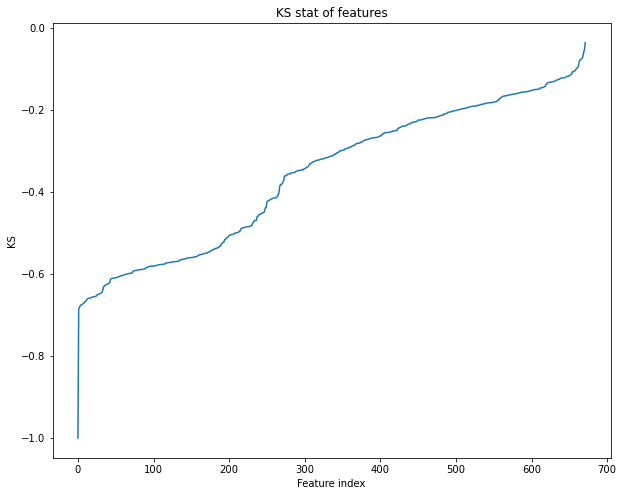

In [241]:
plt.figure(figsize=(10,8))
plt.plot(np.sort(-KSFDR[0][:]))
plt.title("KS stat of features")
plt.ylabel('KS')
plt.xlabel('Feature index')
# plt.savefig("KS_HW5.png", dpi=200)
plt.show()

In [242]:
col_name_red = data.columns
res_df_prof = pd.DataFrame.from_dict({'KS':KSFDR[0][:],'FDR':KSFDR[1][:]},orient='index',
                       columns=col_name_red)

In [243]:
res_df_prof = res_df_prof.transpose()
res_df_prof['Avg'] = res_df_prof.mean(axis = 1)
res_df_prof['KS Rank'] = res_df_prof['KS'].rank(ascending = False)
res_df_prof['FDR Rank'] = res_df_prof['FDR'].rank(ascending=False)
res_df_prof['Average Rank'] = res_df_prof[['KS Rank','FDR Rank']].mean(axis = 1)
res_df_prof_filter = res_df_prof.sort_values(by='Average Rank',ascending=True)
# res_df_filter = res_df_filter.drop(columns='rank_avg')
res_df_prof_filter

,KS,FDR,Avg,KS Rank,FDR Rank,Average Rank
Fraud,1.000000,1.000000,1.000000,1.0,1.0,1.00
cardnum_zip_total_7,0.685118,0.634793,0.659955,2.0,6.0,4.00
cardnum_zip_total_3,0.677772,0.637097,0.657435,4.0,4.0,4.00
cardnum_merch_total_7,0.681401,0.633641,0.657521,3.0,7.0,5.00
cardnum_merches_total_7,0.671453,0.638249,0.654851,9.0,3.0,6.00
...,...,...,...,...,...,...
merchdes_state_actual/toal_30,0.133575,0.008065,0.070820,624.0,657.5,640.75
merchnum_zip_count_1_by_14,0.122437,0.012673,0.067555,643.0,640.5,641.75
merchdes_zip_actual/max_7,0.115809,0.013825,0.064817,652.0,633.5,642.75
merchnum_state_count_0_by_30,0.105568,0.013825,0.059696,658.0,633.5,645.75


In [244]:
#res_df_prof_filter.to_csv('feature selection.csv')

In [105]:
#res_df_prof_filter=pd.read_csv('feature selection.csv',index_col=0)

In [245]:
Y_labels = df_modeling_scaled['Fraud']
features_chosen_filter = res_df_prof_filter.index.values[1:81] #1st column is the fraud label
features_chosen_filter

array(['cardnum_zip_total_7', 'cardnum_zip_total_3',
       'cardnum_merch_total_7', 'cardnum_merches_total_7',
       'cardnum_merch_total_14', 'cardnum_merch_total_3',
       'cardnum_merches_total_3', 'cardnum_state_total_3',
       'cardnum_merches_total_14', 'cardnum_zip_total_14',
       'cardnum_state_total_7', 'cardnum_state_total_1',
       'cardnum_zip_total_1', 'cardnum_merch_total_1',
       'cardnum_merch_total_30', 'cardnum_merches_total_30',
       'cardnum_state_total_14', 'cardnum_merches_total_1',
       'cardnum_zip_total_30', 'cardnum_merches_max_14',
       'cardnum_zip_max_14', 'cardnum_state_total_0',
       'cardnum_merch_total_0', 'cardnum_zip_max_30',
       'cardnum_merches_total_0', 'cardnum_state_max_7',
       'cardnum_zip_total_0', 'cardnum_merches_max_3',
       'cardnum_merch_max_14', 'cardnum_state_max_14',
       'cardnum_merches_max_30', 'cardnum_merch_max_30',
       'cardnum_merches_max_7', 'cardnum_zip_max_7',
       'cardnum_merch_max_3', 'cardnu

In [246]:
X_data = df_modeling_scaled[features_chosen_filter]
print(X_data.shape)
X_data.head()

(80632, 80)


,cardnum_zip_total_7,cardnum_zip_total_3,cardnum_merch_total_7,cardnum_merches_total_7,cardnum_merch_total_14,cardnum_merch_total_3,cardnum_merches_total_3,cardnum_state_total_3,cardnum_merches_total_14,cardnum_zip_total_14,cardnum_state_total_7,cardnum_state_total_1,cardnum_zip_total_1,cardnum_merch_total_1,cardnum_merch_total_30,cardnum_merches_total_30,cardnum_state_total_14,cardnum_merches_total_1,cardnum_zip_total_30,cardnum_merches_max_14,cardnum_zip_max_14,cardnum_state_total_0,cardnum_merch_total_0,cardnum_zip_max_30,cardnum_merches_total_0,cardnum_state_max_7,cardnum_zip_total_0,cardnum_merches_max_3,cardnum_merch_max_14,cardnum_state_max_14,cardnum_merches_max_30,cardnum_merch_max_30,cardnum_merches_max_7,cardnum_zip_max_7,cardnum_merch_max_3,cardnum_zip_max_3,cardnum_state_max_3,cardnum_merch_max_7,Cardnum_total_3,merchdes_state_total_1,Merch description_total_1,Cardnum_total_7,merchnum_zip_total_1,cardnum_merches_max_1,merchdes_zip_total_1,cardnum_merch_max_1,cardnum_zip_max_1,cardnum_state_total_30,merchdes_state_total_0,cardnum_state_max_30,cardnum_state_max_1,Merch description_total_0,merchdes_state_max_0,Merch description_max_0,merchdes_zip_max_0,merchnum_state_total_0,merchdes_state_total_3,merchnum_zip_max_0,merchnum_state_max_0,merchnum_zip_total_0,Merchnum_total_0,merchnum_state_total_1,Merch description_total_3,Merchnum_max_0,merchdes_zip_total_3,Merchnum_total_1,Cardnum_total_1,merchdes_zip_total_0,merchnum_zip_total_3,merchdes_zip_max_1,merchdes_state_max_1,Cardnum_total_0,merchnum_state_total_3,cardnum_state_max_0,Merch description_max_1,cardnum_merches_max_0,Merchnum_total_3,merchnum_zip_max_1,cardnum_zip_max_0,cardnum_merch_max_0
3338,0.303517,-0.076746,0.309282,0.312000,0.285258,-0.073363,-0.071920,-0.098818,0.288136,0.275075,0.247947,-0.080690,-0.068552,-0.066225,0.240776,0.243726,0.178407,-0.065207,0.221756,0.479800,0.461681,-0.084001,-0.074616,0.411508,-0.073552,0.393348,-0.077237,-0.106652,0.482013,0.316515,0.436050,0.441050,0.511695,0.499388,-0.106677,-0.112499,-0.145276,0.512551,0.073878,-0.168885,-0.170611,0.168681,-0.179610,-0.098150,-0.168087,-0.098229,-0.102335,0.054508,-0.147911,0.207206,-0.121126,-0.149150,-0.163486,-0.164958,-0.162936,-0.161570,-0.119555,-0.167866,-0.174531,-0.156039,-0.162053,-0.189373,-0.122533,-0.175137,-0.118425,-0.189925,0.077781,-0.147272,-0.137791,-0.207429,-0.208400,-0.118952,-0.155543,-0.105204,-0.210872,-0.093733,-0.156401,-0.216309,-0.097085,-0.093983
3339,-0.090858,-0.114943,-0.089281,-0.161221,-0.065230,-0.114724,-0.149888,-0.136437,-0.177161,-0.067038,-0.133145,-0.161849,-0.150514,-0.148080,-0.099025,-0.205706,-0.138772,-0.147258,-0.107277,-0.447500,-0.455192,-0.208583,-0.200119,-0.479730,-0.199235,-0.469063,-0.202642,-0.422392,-0.445725,-0.496549,-0.466984,-0.466922,-0.436076,-0.440848,-0.428105,-0.427055,-0.448665,-0.433944,-0.110870,-0.243374,-0.245073,-0.193660,-0.255191,-0.423887,-0.242617,-0.423960,-0.427319,-0.220866,-0.262529,-0.532567,-0.440446,-0.263707,-0.488444,-0.489600,-0.487938,-0.276961,-0.276244,-0.498405,-0.502390,-0.271999,-0.277400,-0.264301,-0.279133,-0.502805,-0.275223,-0.264822,-0.079228,-0.261945,-0.159767,-0.490864,-0.491782,-0.214860,-0.177174,-0.453494,-0.493897,-0.445395,-0.178006,-0.502461,-0.448125,-0.445631
3340,-0.031981,-0.015291,-0.026297,-0.024126,0.368429,-0.011965,-0.010386,0.051969,0.371331,0.358008,0.011325,-0.019169,-0.006421,-0.004176,0.321412,0.324084,0.337804,-0.003009,0.301518,0.069696,0.055184,-0.107297,-0.098084,0.016376,-0.097054,-0.151393,-0.100687,-0.160584,0.070698,-0.043958,0.036678,0.038499,-0.176613,-0.185140,-0.160621,-0.166229,-0.108743,-0.176533,1.135972,-0.112420,-0.114167,1.018389,-0.122317,-0.152331,-0.111591,-0.152409,-0.156391,0.192897,-0.169344,-0.120774,-0.174239,-0.170571,-0.224252,-0.225664,-0.223710,-0.183147,-0.170328,-0.229676,-0.235839,-0.177723,-0.183622,-0.132574,-0.173277,-0.236409,-0.169233,-0.133151,0.316441,-0.168715,-0.190416,-0.254573,-0.255536,-0.136886,-0.207340,-0.170333,-0.2579

In [24]:
!pip install mlxtend

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [132]:
from sklearn.metrics import make_scorer
def custom_FDR(y_true, y_scores):
    res_df = pd.DataFrame({'score':y_scores,'label': y_true}).sort_values(by='score',ascending=False)
    top3_res1 = res_df.head(round(y_true.shape[0]*0.03))
    return (top3_res1['label'].sum()/sum(y_true))

fdr_score = make_scorer(custom_FDR, greater_is_better=True,needs_proba = True)

In [100]:
def fdr(classifier,x,y,cutoff=0.03):
    return fdr_prob(y,classifier.predict_proba(x),cutoff)
def fdr_prob(y,y_prob,cutoff=0.03):
    if len(y_prob.shape)!=1:
        y_prob=y_prob[:,-1:]
    num_fraud=len(y[y==1])
    sorted_prob=np.asarray(sorted(zip(y_prob,y),key=lambda x:x[0],reverse=True))
    cutoff_bin=sorted_prob[0:int(len(y)*cutoff),1:]
    return len(cutoff_bin[cutoff_bin==1])/num_fraud

In [247]:
model1=DecisionTreeClassifier(criterion='gini',max_depth=12)
model2=LogisticRegression(penalty='l2',class_weight='balanced')
sfs=SFS(model2,k_features=79,forward=True,verbose=2,scoring='accuracy',cv=0)
sfs.fit(X_data,Y_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.0s finished

[2021-05-01 21:33:36] Features: 1/79 -- score: 0.9228718126798293[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    6.1s finished

[2021-05-01 21:33:42] Features: 2/79 -- score: 0.9340460363131263[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    6.8s finished

[2021-05-01 21:33:49] Features: 3/79 -- score: 0.9356582994344677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  61 out of  61 | elapsed:   44.2s finished

[2021-05-01 21:41:24] Features: 20/79 -- score: 0.9487796408373846[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   46.2s finished

[2021-05-01 21:44:23] Features: 24/79 -- score: 0.9485936104772299[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   47.6s finished

[2021-05-01 21:54:45] Features: 37/79 -- score: 0.9490400833416014[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   47.4s finished

[2021-05-01 21:57:55] Features: 41/79 -- score: 0.9486804246453021[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   38.2s finished

[2021-05-01 22:07:19] Features: 54/79 -- score: 0.9483579720210338[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   34.8s finished

[2021-05-01 22:09:44] Features: 58/79 -- score: 0.9474402222442703[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.1s finished

[2021-05-01 22:15:47] Features: 73/79 -- score: 0.9448730032741344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

SequentialFeatureSelector(cv=0,
                          estimator=LogisticRegression(class_weight='balanced'),
                          k_features=79, scoring='accuracy', verbose=2)

In [248]:
sfs.k_feature_names_

('cardnum_zip_total_7',
 'cardnum_zip_total_3',
 'cardnum_merch_total_7',
 'cardnum_merches_total_7',
 'cardnum_merch_total_14',
 'cardnum_merch_total_3',
 'cardnum_merches_total_3',
 'cardnum_state_total_3',
 'cardnum_merches_total_14',
 'cardnum_zip_total_14',
 'cardnum_state_total_7',
 'cardnum_state_total_1',
 'cardnum_zip_total_1',
 'cardnum_merch_total_1',
 'cardnum_merch_total_30',
 'cardnum_merches_total_30',
 'cardnum_state_total_14',
 'cardnum_zip_total_30',
 'cardnum_merches_max_14',
 'cardnum_zip_max_14',
 'cardnum_state_total_0',
 'cardnum_merch_total_0',
 'cardnum_zip_max_30',
 'cardnum_merches_total_0',
 'cardnum_state_max_7',
 'cardnum_zip_total_0',
 'cardnum_merches_max_3',
 'cardnum_merch_max_14',
 'cardnum_state_max_14',
 'cardnum_merches_max_30',
 'cardnum_merch_max_30',
 'cardnum_merches_max_7',
 'cardnum_zip_max_7',
 'cardnum_merch_max_3',
 'cardnum_zip_max_3',
 'cardnum_state_max_3',
 'cardnum_merch_max_7',
 'Cardnum_total_3',
 'merchdes_state_total_1',
 'Merch d

In [263]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

D:\anaconda\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(66,)",[0.9228718126798293],0.922872,"(Cardnum_total_1,)",NaN,0,NaN
2,"(15, 66)",[0.9340460363131263],0.934046,"(cardnum_merches_total_30, Cardnum_total_1)",NaN,0,NaN
3,"(15, 39, 66)",[0.9356582994344677],0.935658,"(cardnum_merches_total_30, merchdes_state_tota...",NaN,0,NaN
4,"(15, 30, 39, 66)",[0.9389448357972021],0.938945,"(cardnum_merches_total_30, cardnum_merches_max...",NaN,0,NaN
5,"(5, 15, 30, 39, 66)",[0.9427770612163905],0.942777,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
6,"(5, 15, 29, 30, 39, 66)",[0.9445381486258557],0.944538,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
7,"(5, 15, 29, 30, 39, 64, 66)",[0.9459767834110527],0.945977,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
8,"(5, 15, 29, 30, 32, 39, 64, 66)",[0.9465968846115687],0.946597,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
9,"(5, 15, 29, 30, 32, 39, 64, 66, 74)",[0.947192181764064],0.947192,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
10,"(5, 11, 15, 29, 30, 32, 39, 64, 66, 74)",[0.9474526242682806],0.947453,"(cardnum_merch_total_3, cardnum_state_total_1,...",NaN,0,NaN


D:\anaconda\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


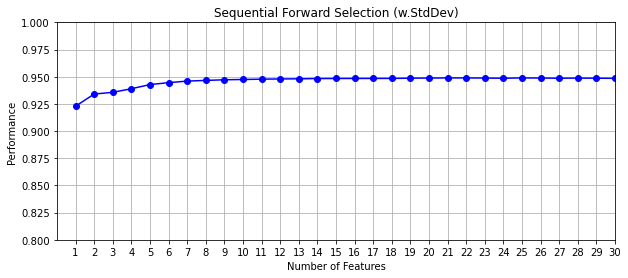

In [264]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1=plot_sfs(sfs.get_metric_dict(),
             kind='std_err',
             figsize=(10,4))
plt.ylim([.8,1])
plt.xlim(0,30)
plt.title('Sequential Forward Selection (w.StdDev)')
plt.grid()
plt.show()

In [265]:
var_SBS=pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [266]:
var_SBS

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(66,)",[0.9228718126798293],0.922872,"(Cardnum_total_1,)",NaN,0,NaN
2,"(15, 66)",[0.9340460363131263],0.934046,"(cardnum_merches_total_30, Cardnum_total_1)",NaN,0,NaN
3,"(15, 39, 66)",[0.9356582994344677],0.935658,"(cardnum_merches_total_30, merchdes_state_tota...",NaN,0,NaN
4,"(15, 30, 39, 66)",[0.9389448357972021],0.938945,"(cardnum_merches_total_30, cardnum_merches_max...",NaN,0,NaN
5,"(5, 15, 30, 39, 66)",[0.9427770612163905],0.942777,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
6,"(5, 15, 29, 30, 39, 66)",[0.9445381486258557],0.944538,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
7,"(5, 15, 29, 30, 39, 64, 66)",[0.9459767834110527],0.945977,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
8,"(5, 15, 29, 30, 32, 39, 64, 66)",[0.9465968846115687],0.946597,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
9,"(5, 15, 29, 30, 32, 39, 64, 66, 74)",[0.947192181764064],0.947192,"(cardnum_merch_total_3, cardnum_merches_total_...",NaN,0,NaN
10,"(5, 11, 15, 29, 30, 32, 39, 64, 66, 74)",[0.9474526242682806],0.947453,"(cardnum_merch_total_3, cardnum_state_total_1,...",NaN,0,NaN


In [267]:
var_SBS.to_csv('varsFS2.csv',index=False)

In [303]:
final_wrapper_columns=var_SBS3.feature_names[20]
final_wrapper_columns

"('cardnum_zip_total_7', 'cardnum_merchdes_total_7', 'cardnum_state_total_3', 'cardnum_merchdes_total_14', 'cardnum_zip_total_14', 'cardnum_state_total_7', 'cardnum_merch_total_1', 'cardnum_merch_total_30', 'cardnum_merchdes_max_14', 'cardnum_merchdes_total_0', 'cardnum_state_max_7', 'cardnum_merch_max_14', 'Cardnum_total_7', 'merchnum_zip_total_1', 'cardnum_merch_max_1', 'merchdes_state_total_0', 'merchdes_zip_max_0', 'merchdes_zip_total_0', 'merchdes_zip_max_1', 'Cardnum_total_0', 'cardnum_merchdes_max_0')"

In [304]:
def Convert(string):
    li = list(string.split(","))
    return li
  
# Driver code    
str1 = final_wrapper_columns[1:-1]
print(Convert(str1))
x=Convert(str1)


["'cardnum_zip_total_7'", " 'cardnum_merchdes_total_7'", " 'cardnum_state_total_3'", " 'cardnum_merchdes_total_14'", " 'cardnum_zip_total_14'", " 'cardnum_state_total_7'", " 'cardnum_merch_total_1'", " 'cardnum_merch_total_30'", " 'cardnum_merchdes_max_14'", " 'cardnum_merchdes_total_0'", " 'cardnum_state_max_7'", " 'cardnum_merch_max_14'", " 'Cardnum_total_7'", " 'merchnum_zip_total_1'", " 'cardnum_merch_max_1'", " 'merchdes_state_total_0'", " 'merchdes_zip_max_0'", " 'merchdes_zip_total_0'", " 'merchdes_zip_max_1'", " 'Cardnum_total_0'", " 'cardnum_merchdes_max_0'"]


In [305]:
final_wrapper_columns=[]
for i in x:
    final_wrapper_columns.append(eval(i))
final_wrapper_columns=np.array(final_wrapper_columns)
final_wrapper_columns


array(['cardnum_zip_total_7', 'cardnum_merchdes_total_7',
       'cardnum_state_total_3', 'cardnum_merchdes_total_14',
       'cardnum_zip_total_14', 'cardnum_state_total_7',
       'cardnum_merch_total_1', 'cardnum_merch_total_30',
       'cardnum_merchdes_max_14', 'cardnum_merchdes_total_0',
       'cardnum_state_max_7', 'cardnum_merch_max_14', 'Cardnum_total_7',
       'merchnum_zip_total_1', 'cardnum_merch_max_1',
       'merchdes_state_total_0', 'merchdes_zip_max_0',
       'merchdes_zip_total_0', 'merchdes_zip_max_1', 'Cardnum_total_0',
       'cardnum_merchdes_max_0'], dtype='<U25')

In [111]:
start_time = pd.datetime.now()
print("started at ",start_time)

log_reg = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_logreg = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(2),min_features_to_select=20,
              scoring=fdr,n_jobs=-1)
rfecv_logreg.fit(X_data, Y_labels)
print('duration: ', pd.datetime.now() - start_time)

print("Number of features chosen: %d" % rfecv_logreg.n_features_)

<ipython-input-111-6df617c02aa9>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


started at  2021-05-01 12:11:13.646692


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

duration:  0:02:10.396215
Number of features chosen: 43


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-111-6df617c02aa9>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print('duration: ', pd.datetime.now() - start_time)


In [119]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv_logreg.ranking_), X_data)),
                            columns = ['ranking', 'variable'])
features_chosen_wrapper = X_data.columns[rfecv_logreg.support_].values
print(features_chosen_wrapper)
var_selected.to_csv('fs_logreg_ranks.csv')


['cardnum_merch_total_7' 'cardnum_merch_total_14' 'cardnum_merch_total_3'
 'cardnum_state_total_3' 'cardnum_zip_total_14' 'cardnum_zip_total_1'
 'cardnum_merch_total_30' 'cardnum_state_total_14' 'cardnum_merch_total_0'
 'cardnum_zip_max_14' 'cardnum_zip_total_0' 'cardnum_zip_max_7'
 'cardnum_state_max_14' 'cardnum_merch_max_30' 'cardnum_zip_max_3'
 'cardnum_merch_max_3' 'cardnum_merch_max_7' 'Cardnum_total_7'
 'merchnum_zip_total_1' 'cardnum_zip_max_1' 'cardnum_state_max_30'
 'merchnum_zip_max_0' 'merchnum_state_total_1' 'Cardnum_total_1'
 'Merchnum_total_1' 'Cardnum_total_0' 'cardnum_state_max_0'
 'cardnum_zip_max_0' 'merchnum_zip_max_1' 'merchnum_zip_max_3'
 'Merchnum_max_1' 'Cardnum_max_1' 'Cardnum_total_14'
 'merchnum_zip_total_7' 'Cardnum_max_14' 'Cardnum_avg_1'
 'merchnum_zip_avg_0' 'merchnum_state_avg_0' 'cardnum_state_avg_1'
 'Merchnum_avg_0' 'cardnum_merch_avg_3' 'cardnum_merch_avg_0'
 'cardnum_state_avg_0']


In [316]:
df_modeling_scaled=pd.read_csv('df_modeling_scaled.csv')
df_oot=pd.read_csv('df_oot.csv')
var_selected_rfe=pd.read_csv('fs_logreg_ranks.csv')
var_SBS=pd.read_csv('varsFS.csv')
var_SBS2=pd.read_csv('varsFS2.csv')
var_SBS3=pd.read_csv('varsFS_log_roc.csv')

In [116]:
final_wrapper_columns = var_selected_rfe.variable.values[:43]
final_wrapper_columns

array(['Cardnum_avg_1', 'Cardnum_max_1', 'Cardnum_max_14',
       'Cardnum_total_0', 'Cardnum_total_1', 'Cardnum_total_14',
       'Cardnum_total_7', 'Merchnum_avg_0', 'Merchnum_max_1',
       'Merchnum_total_1', 'cardnum_merch_avg_0', 'cardnum_merch_avg_3',
       'cardnum_merch_max_3', 'cardnum_merch_max_30',
       'cardnum_merch_max_7', 'cardnum_merch_total_0',
       'cardnum_merch_total_14', 'cardnum_merch_total_3',
       'cardnum_merch_total_30', 'cardnum_merch_total_7',
       'cardnum_state_avg_0', 'cardnum_state_avg_1',
       'cardnum_state_max_0', 'cardnum_state_max_14',
       'cardnum_state_max_30', 'cardnum_state_total_14',
       'cardnum_state_total_3', 'cardnum_zip_max_0', 'cardnum_zip_max_1',
       'cardnum_zip_max_14', 'cardnum_zip_max_3', 'cardnum_zip_max_7',
       'cardnum_zip_total_0', 'cardnum_zip_total_1',
       'cardnum_zip_total_14', 'merchnum_state_avg_0',
       'merchnum_state_total_1', 'merchnum_zip_avg_0',
       'merchnum_zip_max_0', 'merchnum_zip_m

In [317]:
X_models = df_modeling_scaled[final_wrapper_columns] # training set
Y_labels = df_modeling_scaled['Fraud'] #labels
X_oot_orig = df_oot[final_wrapper_columns] #OOT set
Y_oot_orig = df_oot['Fraud']

In [69]:
#logistic regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [122]:

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    clf = LogisticRegressionCV(cv=10,Cs=[0.01],max_iter=1000)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    clf.fit(X_trn,Y_trn.values.ravel())
    predictions=clf.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=clf.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=clf.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])

0 0.49434571890145396 0.43775100401606426 0.2681564245810056
1 0.4672131147540984 0.47674418604651164 0.2737430167597765
2 0.5049342105263158 0.4807692307692308 0.2849162011173184
3 0.4659270998415214 0.5147679324894515 0.2849162011173184
4 0.4803921568627451 0.4765625 0.2569832402234637
5 0.47429519071310117 0.4641509433962264 0.2737430167597765
6 0.46763754045307443 0.488 0.27932960893854747
7 0.471169686985173 0.4942528735632184 0.2849162011173184
8 0.5079617834394905 0.48333333333333334 0.25139664804469275
9 0.47761194029850745 0.4641509433962264 0.22905027932960895


In [72]:
FDR3.mean()


trn    0.483291
tst    0.501680
oot    0.272626
dtype: float64

In [93]:
#Random Forests

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [318]:
# Random Forest 1
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 50, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7591973244147158 0.674074074074074 0.4581005586592179
1 0.7766830870279147 0.7567567567567568 0.5586592178770949
2 0.7717569786535303 0.7374517374517374 0.553072625698324
3 0.7479406919275123 0.7394636015325671 0.46368715083798884
4 0.7796327212020033 0.7323420074349443 0.5363128491620112
5 0.7567114093959731 0.7169117647058824 0.5307262569832403
6 0.7595356550580431 0.7547169811320755 0.5586592178770949
7 0.7765089722675367 0.8117647058823529 0.5698324022346368
8 0.7544715447154472 0.758893280632411 0.547486033519553
9 0.7739273927392739 0.7442748091603053 0.5642458100558659


trn    0.765637
tst    0.742665
oot    0.534078
dtype: float64

In [319]:
# Random Forest 2
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 60, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7783251231527094 0.7451737451737451 0.547486033519553
1 0.7607655502392344 0.7427385892116183 0.553072625698324
2 0.770096463022508 0.7804878048780488 0.553072625698324
3 0.7541254125412541 0.7290076335877863 0.5251396648044693
4 0.7678275290215588 0.7132075471698113 0.5363128491620112
5 0.7648054145516074 0.7509025270758123 0.5363128491620112
6 0.7703826955074875 0.7453183520599251 0.5586592178770949
7 0.7430441898527005 0.7587548638132295 0.547486033519553
8 0.7658862876254181 0.774074074074074 0.4860335195530726
9 0.7278797996661102 0.7211895910780669 0.46368715083798884


trn    0.760314
tst    0.746085
oot    0.530726
dtype: float64

In [320]:
# Random Forest 3
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 70, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7890365448504983 0.7218045112781954 0.553072625698324
1 0.7491525423728813 0.6942446043165468 0.45251396648044695
2 0.760655737704918 0.7635658914728682 0.553072625698324
3 0.7840136054421769 0.7464285714285714 0.6033519553072626
4 0.7675941080196399 0.7665369649805448 0.5642458100558659
5 0.7553017944535073 0.7098039215686275 0.5307262569832403
6 0.7414075286415712 0.708171206225681 0.5251396648044693
7 0.7601957585644372 0.7607843137254902 0.5139664804469274
8 0.768695652173913 0.7201365187713311 0.5251396648044693
9 0.768581081081081 0.7644927536231884 0.5754189944134078


trn    0.764463
tst    0.735597
oot    0.539665
dtype: float64

In [321]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 80, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7745571658615137 0.7732793522267206 0.5586592178770949
1 0.7823240589198036 0.7276264591439688 0.5586592178770949
2 0.7820299500831946 0.7340823970037453 0.5754189944134078
3 0.7673667205169629 0.7751004016064257 0.553072625698324
4 0.765993265993266 0.7700729927007299 0.5027932960893855
5 0.7569786535303776 0.7606177606177607 0.5642458100558659
6 0.7772357723577236 0.7114624505928854 0.547486033519553
7 0.7834179357021996 0.7364620938628159 0.5586592178770949
8 0.7608346709470305 0.7836734693877551 0.547486033519553
9 0.7798634812286689 0.7659574468085106 0.5698324022346368


trn    0.773060
tst    0.753833
oot    0.553631
dtype: float64

In [322]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 90, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.779874213836478 0.75 0.553072625698324
1 0.78125 0.7692307692307693 0.5754189944134078
2 0.7625 0.7763157894736842 0.5754189944134078
3 0.7678571428571429 0.7896825396825397 0.5586592178770949
4 0.7654723127035831 0.8070866141732284 0.5754189944134078
5 0.7398648648648649 0.6992753623188406 0.43575418994413406
6 0.7683333333333333 0.7425373134328358 0.5586592178770949
7 0.7680921052631579 0.7384615384615385 0.5418994413407822
8 0.7824 0.757201646090535 0.5865921787709497
9 0.7804878048780488 0.7470355731225297 0.547486033519553


trn    0.769613
tst    0.757683
oot    0.550838
dtype: float64

In [323]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100, max_depth=5)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7865546218487395 0.7435897435897436 0.5642458100558659
1 0.7508038585209004 0.7439024390243902 0.553072625698324
2 0.7633333333333333 0.75 0.5698324022346368
3 0.76 0.7611940298507462 0.547486033519553
4 0.7798013245033113 0.7045454545454546 0.5418994413407822
5 0.7733990147783252 0.7181467181467182 0.5642458100558659
6 0.7761194029850746 0.7169811320754716 0.553072625698324
7 0.773356401384083 0.7379310344827587 0.5586592178770949
8 0.7746243739565943 0.7286245353159851 0.4748603351955307
9 0.775206611570248 0.7414448669201521 0.5418994413407822


trn    0.771320
tst    0.734636
oot    0.546927
dtype: float64

In [324]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 50, max_depth=6)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.8016949152542373 0.7230215827338129 0.5586592178770949
1 0.7945670628183361 0.7562724014336918 0.553072625698324
2 0.7860615883306321 0.7410358565737052 0.5642458100558659
3 0.8152350081037277 0.7091633466135459 0.5921787709497207
4 0.7768595041322314 0.7984790874524715 0.5586592178770949
5 0.7870967741935484 0.7540322580645161 0.6089385474860335
6 0.7927631578947368 0.7615384615384615 0.547486033519553
7 0.7883683360258481 0.7630522088353414 0.553072625698324
8 0.8 0.7649253731343284 0.6033519553072626
9 0.7847896440129449 0.744 0.5698324022346368


trn    0.792744
tst    0.751552
oot    0.570950
dtype: float64

In [325]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 60, max_depth=6)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.8211920529801324 0.678030303030303 0.6089385474860335
1 0.7949579831932773 0.7472527472527473 0.5418994413407822
2 0.8078902229845626 0.7333333333333333 0.5810055865921788
3 0.7876823338735819 0.7609561752988048 0.5586592178770949
4 0.797716150081566 0.7490196078431373 0.547486033519553
5 0.7927461139896373 0.7612456747404844 0.5698324022346368
6 0.8086522462562395 0.797752808988764 0.5754189944134078
7 0.8078902229845626 0.7228070175438597 0.5363128491620112
8 0.7871287128712872 0.767175572519084 0.5642458100558659
9 0.8111111111111111 0.7058823529411765 0.553072625698324


trn    0.801697
tst    0.742346
oot    0.563687
dtype: float64

In [326]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 70, max_depth=6)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7859531772575251 0.725925925925926 0.5754189944134078
1 0.8130081300813008 0.7272727272727273 0.5921787709497207
2 0.8091993185689949 0.7153024911032029 0.5754189944134078
3 0.7964169381107492 0.7598425196850394 0.5586592178770949
4 0.7921635434412265 0.7651245551601423 0.5754189944134078
5 0.7745098039215687 0.78515625 0.4692737430167598
6 0.7798013245033113 0.7575757575757576 0.5865921787709497
7 0.7911184210526315 0.7615384615384615 0.5698324022346368
8 0.7809983896940419 0.7651821862348178 0.553072625698324
9 0.8022690437601296 0.7290836653386454 0.5698324022346368


trn    0.792544
tst    0.749200
oot    0.562570
dtype: float64

In [327]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 80, max_depth=6)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy() 
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.795751633986928 0.73828125 0.5754189944134078
1 0.8073089700996677 0.7406015037593985 0.5698324022346368
2 0.7854889589905363 0.7564102564102564 0.5586592178770949
3 0.8013468013468014 0.718978102189781 0.5810055865921788
4 0.7938671209540034 0.7437722419928826 0.553072625698324
5 0.7919354838709678 0.7459677419354839 0.5698324022346368
6 0.7744 0.7736625514403292 0.5698324022346368
7 0.7893864013266998 0.7433962264150943 0.547486033519553
8 0.7852459016393443 0.7674418604651163 0.553072625698324
9 0.785234899328859 0.7720588235294118 0.5865921787709497


trn    0.790997
tst    0.750057
oot    0.566480
dtype: float64

In [328]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 90, max_depth=6)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.8030050083472454 0.7695167286245354 0.5586592178770949
1 0.8057784911717496 0.7510204081632653 0.5810055865921788
2 0.8023648648648649 0.7572463768115942 0.5754189944134078
3 0.7969283276450512 0.7659574468085106 0.5754189944134078
4 0.7884297520661157 0.7756653992395437 0.6033519553072626
5 0.7976588628762542 0.7518518518518519 0.5810055865921788
6 0.8054226475279107 0.7717842323651453 0.5642458100558659
7 0.7914614121510674 0.722007722007722 0.5865921787709497
8 0.7909967845659164 0.7601626016260162 0.5754189944134078
9 0.7939297124600639 0.756198347107438 0.5865921787709497


trn    0.797598
tst    0.758141
oot    0.578771
dtype: float64

In [329]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100, max_depth=6)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7935483870967742 0.7620967741935484 0.5698324022346368
1 0.7964743589743589 0.75 0.5698324022346368
2 0.7783333333333333 0.7611940298507462 0.5810055865921788
3 0.7637540453074434 0.812 0.5865921787709497
4 0.7927631578947368 0.7576923076923077 0.5698324022346368
5 0.7740863787375415 0.7593984962406015 0.5586592178770949
6 0.797945205479452 0.75 0.5251396648044693
7 0.7946708463949843 0.7304347826086957 0.5642458100558659
8 0.7886855241264559 0.7453183520599251 0.5754189944134078
9 0.7697262479871175 0.8178137651821862 0.5642458100558659


trn    0.784999
tst    0.764595
oot    0.566480
dtype: float64

In [330]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 50, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.762684124386252 0.7237354085603113 0.48044692737430167
1 0.7128874388254486 0.7294117647058823 0.40782122905027934
2 0.732463295269168 0.7058823529411765 0.4692737430167598
3 0.7358184764991896 0.7051792828685259 0.5307262569832403
4 0.7335526315789473 0.676923076923077 0.41899441340782123
5 0.7405582922824302 0.6872586872586872 0.553072625698324
6 0.7330016583747927 0.6830188679245283 0.553072625698324
7 0.7386363636363636 0.6865079365079365 0.40782122905027934
8 0.7312 0.720164609053498 0.5418994413407822
9 0.7265238879736409 0.6819923371647509 0.45251396648044695


trn    0.734733
tst    0.700007
oot    0.481564
dtype: float64

In [331]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 60, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7159663865546219 0.6923076923076923 0.4245810055865922
1 0.7174959871589085 0.6979591836734694 0.5251396648044693
2 0.7155025553662692 0.7295373665480427 0.4692737430167598
3 0.7383333333333333 0.6753731343283582 0.441340782122905
4 0.7414075286415712 0.6809338521400778 0.41899441340782123
5 0.7627677100494233 0.735632183908046 0.5307262569832403
6 0.7043189368770764 0.7481203007518797 0.39106145251396646
7 0.7495908346972177 0.708171206225681 0.4860335195530726
8 0.7701342281879194 0.7095588235294118 0.553072625698324
9 0.7445378151260504 0.7032967032967034 0.5027932960893855


trn    0.736006
tst    0.708089
oot    0.474302
dtype: float64

In [332]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 70, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7408 0.6872427983539094 0.4134078212290503
1 0.7724252491694352 0.6954887218045113 0.5642458100558659
2 0.7064516129032258 0.7258064516129032 0.4860335195530726
3 0.7302100161550888 0.7228915662650602 0.4972067039106145
4 0.7426810477657936 0.7808219178082192 0.4972067039106145
5 0.7572649572649572 0.7455830388692579 0.5363128491620112
6 0.7289256198347107 0.7072243346007605 0.547486033519553
7 0.7414634146341463 0.7312252964426877 0.553072625698324
8 0.729818780889621 0.6666666666666666 0.4748603351955307
9 0.7599337748344371 0.7272727272727273 0.5418994413407822


trn    0.740997
tst    0.719022
oot    0.511173
dtype: float64

In [333]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 80, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.714968152866242 0.7291666666666666 0.547486033519553
1 0.7313691507798961 0.711340206185567 0.4748603351955307
2 0.756578947368421 0.7346153846153847 0.5586592178770949
3 0.7440381558028617 0.694560669456067 0.5307262569832403
4 0.7128547579298832 0.7397769516728625 0.45251396648044695
5 0.7483221476510067 0.7279411764705882 0.5363128491620112
6 0.7224080267558528 0.7037037037037037 0.5363128491620112
7 0.7232289950576606 0.7241379310344828 0.5251396648044693
8 0.752542372881356 0.7050359712230215 0.5139664804469274
9 0.745928338762215 0.7204724409448819 0.5363128491620112


trn    0.735224
tst    0.719075
oot    0.521229
dtype: float64

In [334]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 90, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7445742904841403 0.7472118959107806 0.5363128491620112
1 0.746031746031746 0.7226890756302521 0.5363128491620112
2 0.7268292682926829 0.7312252964426877 0.5083798882681564
3 0.7333333333333333 0.6604477611940298 0.37988826815642457
4 0.717391304347826 0.7481481481481481 0.40782122905027934
5 0.7397708674304418 0.6809338521400778 0.4134078212290503
6 0.7345890410958904 0.6584507042253521 0.4748603351955307
7 0.735632183908046 0.722007722007722 0.5307262569832403
8 0.717206132879046 0.7437722419928826 0.46368715083798884
9 0.7135842880523732 0.7237354085603113 0.46368715083798884


trn    0.730894
tst    0.713862
oot    0.471508
dtype: float64

In [335]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100, max_depth=10)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.7303370786516854 0.689795918367347 0.5418994413407822
1 0.7377049180327869 0.7054263565891473 0.40782122905027934
2 0.7154742096505824 0.7453183520599251 0.547486033519553
3 0.7290322580645161 0.6693548387096774 0.4860335195530726
4 0.747457627118644 0.6870503597122302 0.5363128491620112
5 0.7268211920529801 0.6856060606060606 0.41899441340782123
6 0.739424703891709 0.703971119133574 0.4972067039106145
7 0.7537190082644628 0.7186311787072244 0.5586592178770949
8 0.7536945812807881 0.7181467181467182 0.553072625698324
9 0.7275747508305648 0.7030075187969925 0.4692737430167598


trn    0.736124
tst    0.702631
oot    0.501676
dtype: float64

In [336]:
# Random Forest 4
FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)
    
    random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100, max_depth=15)
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    
    random_forest_1.fit(X_trn,Y_trn.values.ravel())
    predictions=random_forest_1.predict_proba(X_trn)[:,1]
    
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_tst)[:,1]
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=random_forest_1.predict_proba(X_oot)[:,1]
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
FDR3.mean()

0 0.89171974522293 0.7958333333333333 0.5810055865921788
1 0.8878048780487805 0.7865612648221344 0.6145251396648045
2 0.8915857605177994 0.8 0.6033519553072626
3 0.8861646234676007 0.8518518518518519 0.6089385474860335
4 0.8860759493670886 0.8601694915254238 0.6033519553072626
5 0.8852988691437803 0.8152610441767069 0.5865921787709497
6 0.8776859504132232 0.8593155893536122 0.5865921787709497
7 0.8727858293075684 0.7935222672064778 0.5865921787709497
8 0.8857142857142857 0.7948717948717948 0.6089385474860335
9 0.8885191347753744 0.8352059925093633 0.6145251396648045


trn    0.885336
tst    0.819259
oot    0.599441
dtype: float64